In [3]:
import pandas as pd

import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from tabulate import tabulate

[nltk_data] Downloading package punkt to /Users/orherbin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orherbin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/orherbin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ModuleNotFoundError: No module named 'wordcloud'

Or Herbin
Mark Livshitz

# Question number 1: Loading CSV data.

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

# Question number 2: tokenization.

In [ ]:
import string

df['tokenized'] = df['text'].apply(word_tokenize)
df['low_caps'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
punc = string.punctuation
df['no_punc'] = df['low_caps'].apply(lambda x: [word for word in x if word not in punc])
stop_words = set(stopwords.words('english'))
df['none_stopWords'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

# Question number 3: EDA.

In [ ]:
words = df['none_stopWords']
allWords = []
for word in words:
    allWords += word

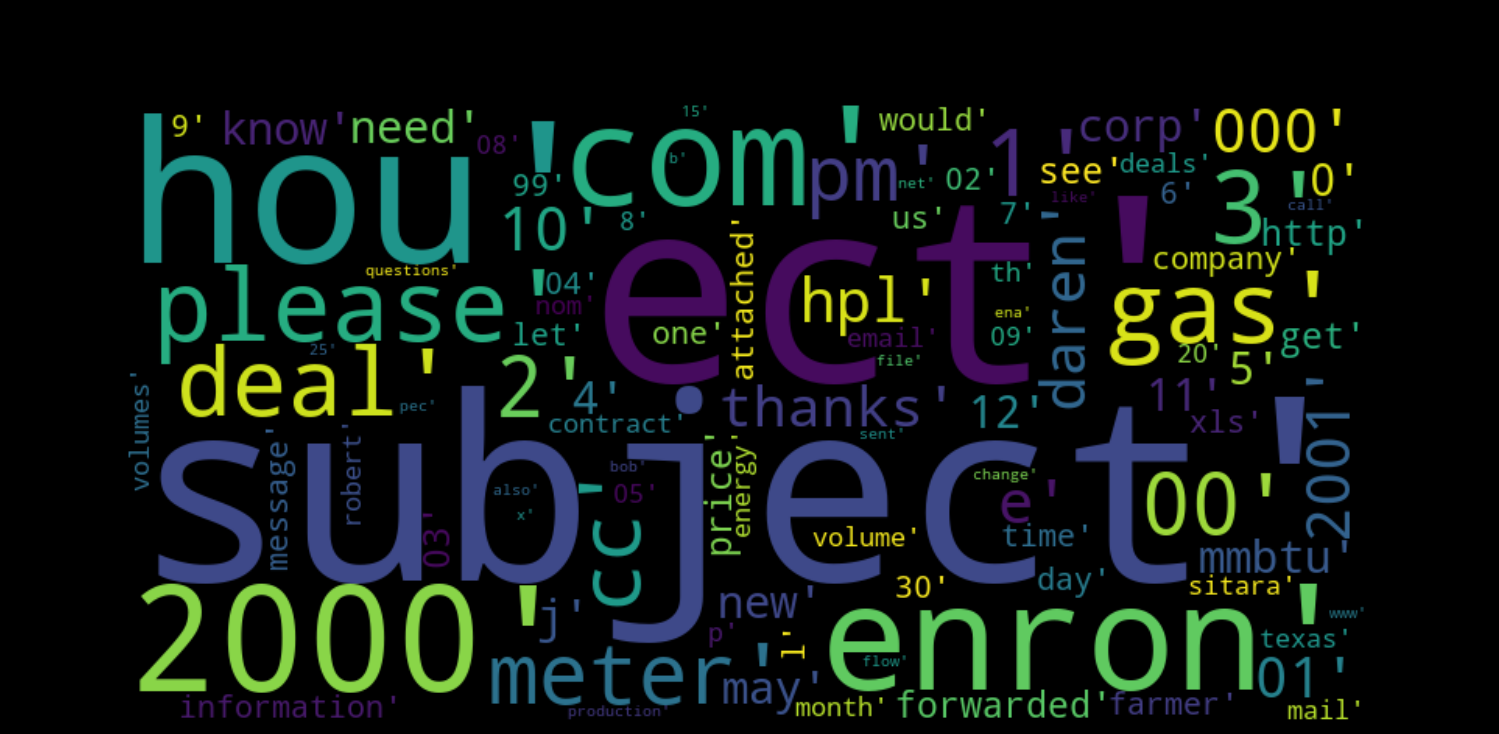

In [ ]:
mostCommon = FreqDist(allWords).most_common(100)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(str(mostCommon))
fig = plt.figure(figsize=(30, 10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

We can see that a lot of the words are general email words. We will remove all the numbers from the vocabulary.

In [ ]:
df['no_num'] = df['none_stopWords'].apply(lambda x: [word for word in x if word.isnumeric() == False])
words = df['no_num']
allWords = []
for word in words:
    allWords += word

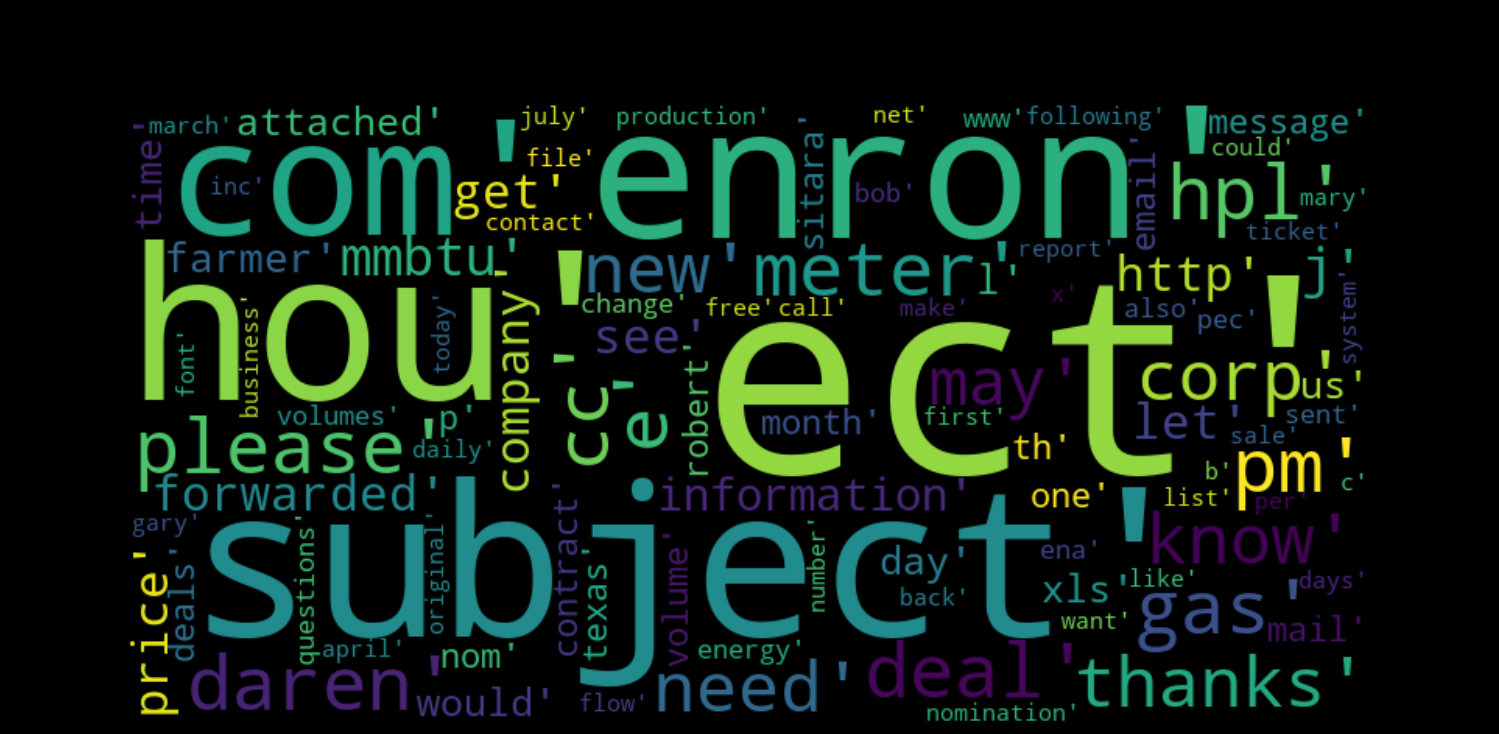

In [ ]:
mostCommon = FreqDist(allWords).most_common(100)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(str(mostCommon))
fig = plt.figure(figsize=(30, 10), facecolor='black')
plt.imshow(wordcloud, interpolation="white")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
spamWords = []
hamWords = []
for index, row in df.iterrows():
    if row["label"] == 'ham':
        hamWords += row["no_num"]
    else:
        spamWords += row["no_num"]

Presenting tokens frequency:

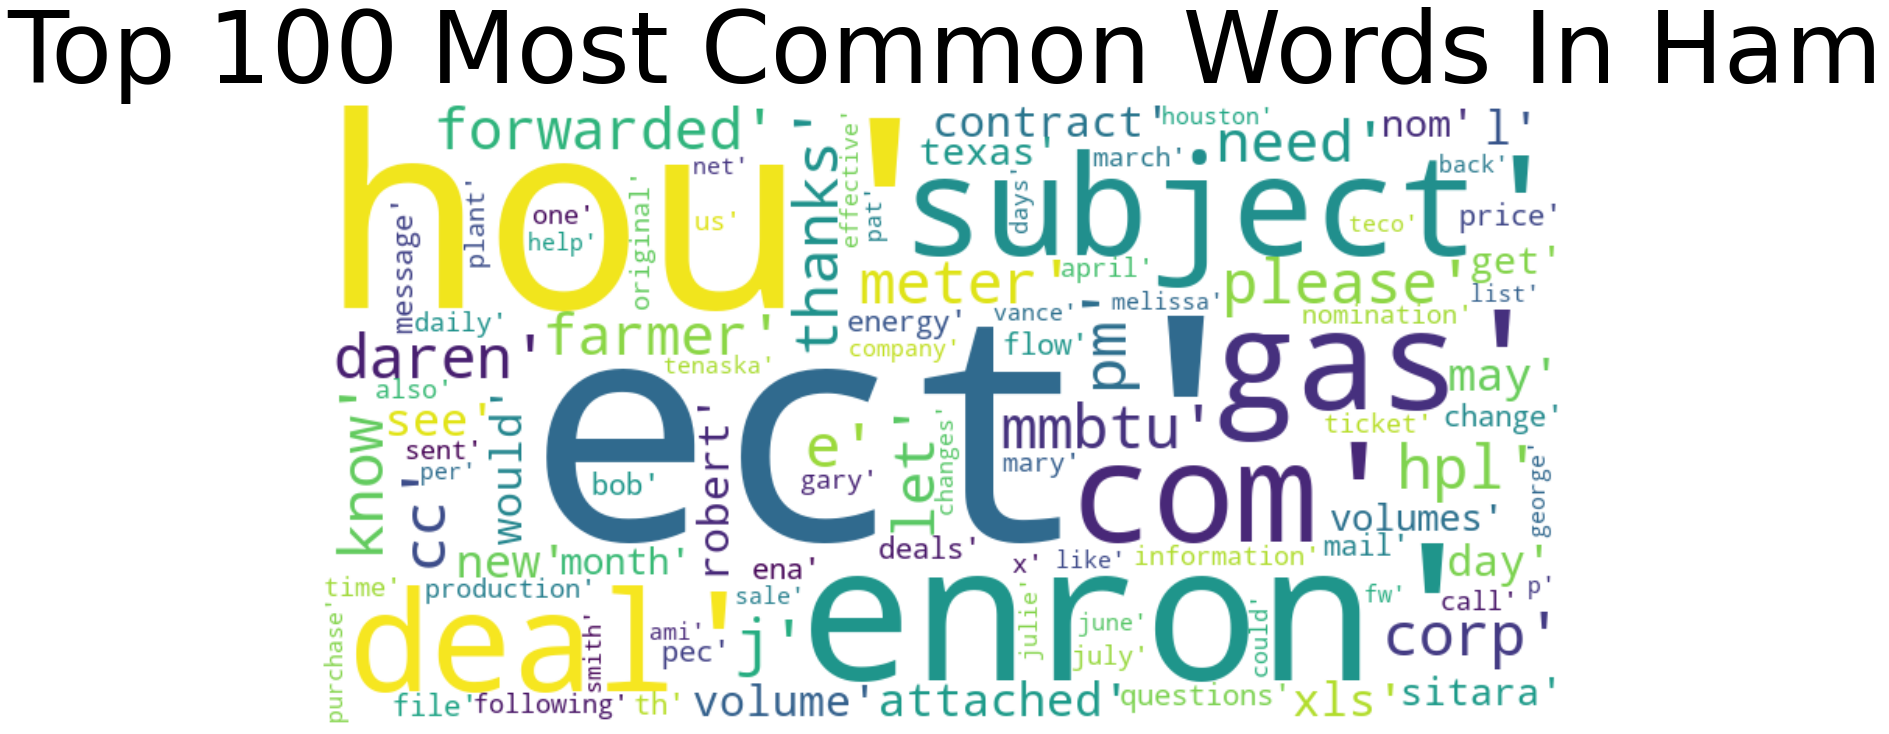

In [ ]:
mostCommon = FreqDist(hamWords).most_common(100)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(mostCommon))
fig = plt.figure(figsize=(30, 10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words In Ham', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

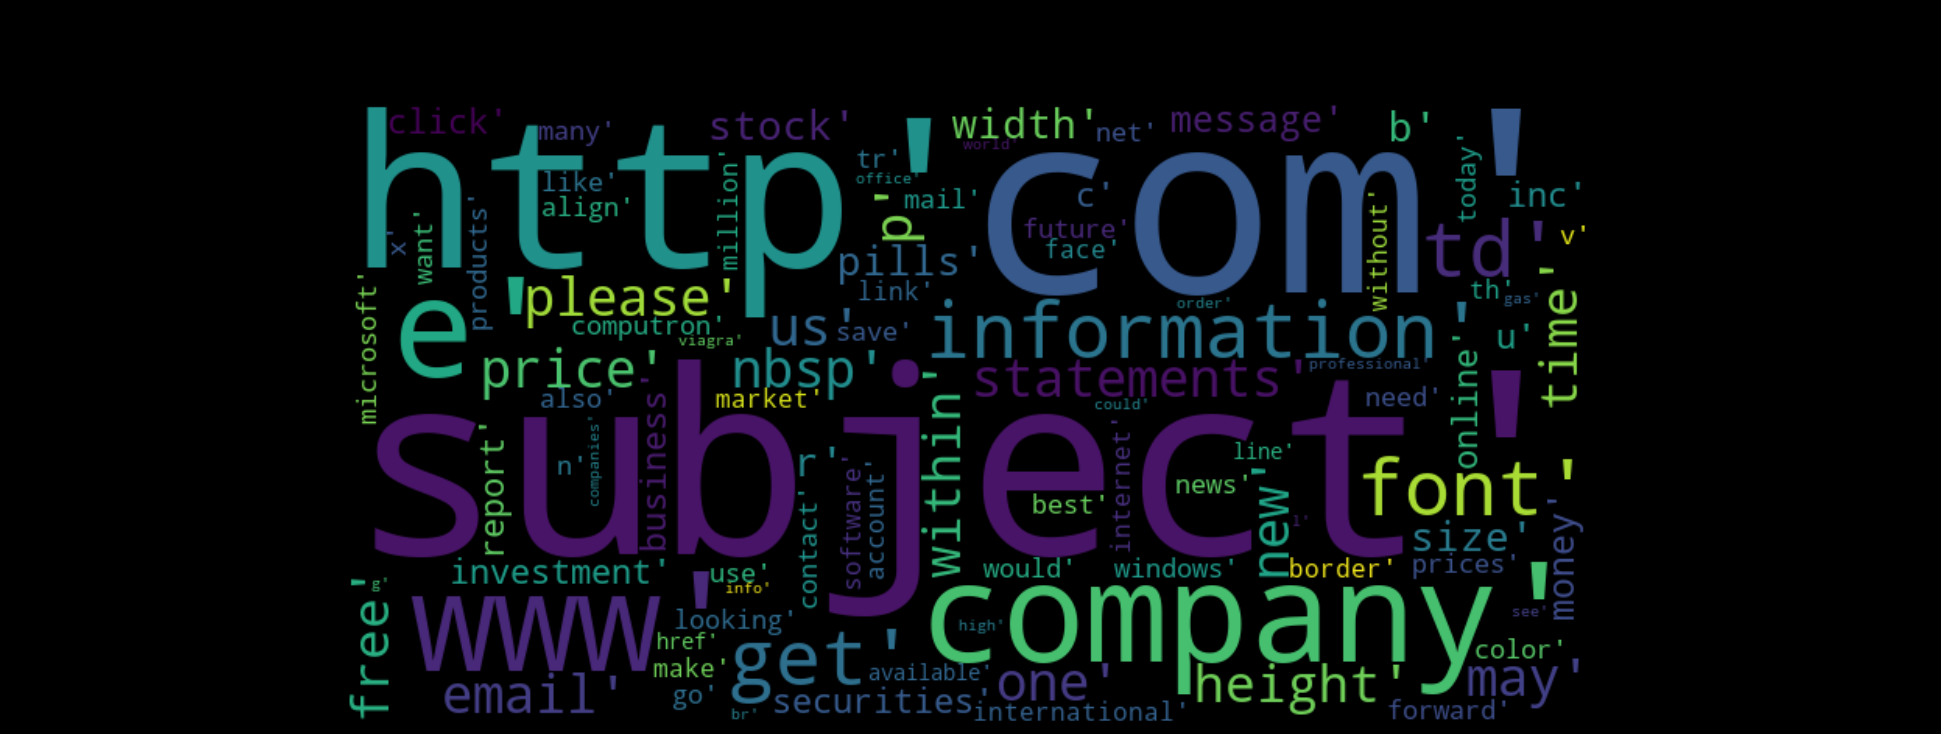

In [ ]:
mostCommon = FreqDist(spamWords).most_common(100)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(str(mostCommon))
fig = plt.figure(figsize=(30, 10), facecolor='black')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words In Spam', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

# Question number 4: Features extraction.

In [ ]:
spamWords_value = []
hamWords_value = []
for word in FreqDist(spamWords).most_common(100):
    spamWords_value.append(word[0])
for word in FreqDist(hamWords).most_common(100):
    hamWords_value.append(word[0])

len(list(set(spamWords_value) - set(hamWords_value)))

72

We see there are 72 words from top 100 that aren't in the top 100 of ham words.
We will extract those words to be our features.

In [ ]:
featSpam = list(set(spamWords_value) - set(hamWords_value))
df['featSpam'] = df['no_num'].apply(lambda x: [word for word in x if word in featSpam])
df['processed'] = [' '.join(map(str, l)) for l in df['no_num']]
df['spam_features'] = [' '.join(map(str, l)) for l in df['featSpam']]

df.head()

# Questions number 5-7: Models Creation and accuracy assessment.

In [ ]:
vectCount = CountVectorizer()
X = vectCount.fit_transform(df['processed'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['label_num'], test_size=0.25, random_state=42)

The first classification algorithm we chose is the Logistic Regression Model.

In [ ]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

In [ ]:
all_lr_recall = recall_score(y_pred, y_test)
all_lr_precision = precision_score(y_pred, y_test)
all_lr_accuracy = accuracy_score(y_pred, y_test)
all_lr_f1 = f1_score(y_pred, y_test)

In [ ]:
all_lr = ['Logistic Regression on all tokens', all_lr_recall, all_lr_precision, all_lr_accuracy, all_lr_f1]
print(all_lr_recall, all_lr_precision, all_lr_accuracy, all_lr_f1)

0.944 0.9752066115702479 0.9767981438515081 0.959349593495935


Looking at the results, accuracy is high but the recall and precision are slightly lower. We could change the weight of each of the classes depending on the business case and the decision of the organization.

Using the Linear SVC algorithm.

In [ ]:
clf_svc = LinearSVC(random_state=0).fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)

In [ ]:
all_svc_recall = recall_score(y_pred, y_test)
all_svc_precision = precision_score(y_pred, y_test)
all_svc_accuracy = accuracy_score(y_pred, y_test)
all_svc_f1 = f1_score(y_pred, y_test)

In [ ]:
all_svc = ['SVC on all tokens', all_svc_recall, all_svc_precision, all_svc_accuracy, all_svc_f1]
print(all_svc_recall, all_svc_precision, all_svc_accuracy, all_svc_f1)

0.94579945799458 0.9614325068870524 0.9737045630317092 0.9535519125683061


We can see that the model using the SVC algorithm is almost exactly the same as the Logistic Regression scores.

The next test we'll take the top 100 words and see if that provides better or worse results.
The risk of using so many features is that this could make the model prone to variance and cause it to over-fit.
Using the top 100 words might help with overfitting and making sure that the model doesn't just memorize the train set.

In [ ]:
vectCount = CountVectorizer(max_features=100)
X = vectCount.fit_transform(df['processed'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['label_num'], test_size=0.25, random_state=42)

In [ ]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

In [ ]:
hun_lr_recall = recall_score(y_pred, y_test)
hun_lr_precision = precision_score(y_pred, y_test)
hun_lr_accuracy = accuracy_score(y_pred, y_test)
hun_lr_f1 = f1_score(y_pred, y_test)

In [ ]:
hun_lr = ['Logistic Regression on Top 100 words', hun_lr_recall, hun_lr_precision, hun_lr_accuracy, hun_lr_f1]
print(hun_lr_recall, hun_lr_precision, hun_lr_accuracy, hun_lr_f1)

0.8564356435643564 0.953168044077135 0.9419953596287703 0.9022164276401564


All 3 scores have been highly affected. It proves that using the top 100 words is a bad direction.
Using the top 100 words makes the model underfit, and not allowing it to learn enough about the data in order to predict the spam.
We can also see that the recall has been affected very badly.

In [ ]:
clf_svc = LinearSVC(random_state=0).fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)

In [ ]:
hun_svc_recall = recall_score(y_pred, y_test)
hun_svc_precision = precision_score(y_pred, y_test)
hun_svc_accuracy = accuracy_score(y_pred, y_test)
hun_svc_f1 = f1_score(y_pred, y_test)

In [ ]:
hun_svc = ['SVC on Top 100 words', hun_svc_recall, hun_svc_precision, hun_svc_accuracy, hun_svc_f1]
print(hun_svc_recall, hun_svc_precision, hun_svc_accuracy, hun_svc_f1)

0.8668341708542714 0.9504132231404959 0.9450889404485692 0.9067017082785809


Here again, we see that choosing the top 100 words was not a good decision.

Doing the same for the spam features we created to see what results it will produce.

In [ ]:
vectCount = CountVectorizer()
X = vectCount.fit_transform(df['spam_features'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['label_num'], test_size=0.25, random_state=42)

In [ ]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

In [ ]:
spam_recall = recall_score(y_pred, y_test)
spam_precision = precision_score(y_pred, y_test)
spam_accuracy = accuracy_score(y_pred, y_test)
spam_f1 = f1_score(y_pred, y_test)

In [ ]:
spam_lr = ['Logistic Regression on hand-picked spam words', spam_recall, spam_precision, spam_accuracy, spam_f1]
print(spam_recall, spam_precision, spam_accuracy, spam_f1)

0.82 0.45179063360881544 0.8182521268368136 0.5825932504440497


Here we can see that the recall and accuracy are not high, but the precision is very bad, the reason for this is probably because the 72 words aren't in all emails, which creates very a sparse representation of the original data which causing a lost of a lot of data.

# Question number 8: Results matrix.

In [ ]:
results = [all_lr, all_svc, hun_lr, hun_svc, spam_lr]
col_names = ['Model', 'Recall', 'Precision', 'Accuracy', 'F1 Score']

print(tabulate(results, headers=col_names))

Model                                            Recall    Precision    Accuracy    F1 Score
---------------------------------------------  --------  -----------  ----------  ----------
Logistic Regression on all tokens              0.944        0.975207    0.976798    0.95935
SVC on all tokens                              0.945799     0.961433    0.973705    0.953552
Logistic Regression on Top 100 words           0.856436     0.953168    0.941995    0.902216
SVC on Top 100 words                           0.866834     0.950413    0.945089    0.906702
Logistic Regression on hand-picked spam words  0.82         0.451791    0.818252    0.582593


# Question number 9: Conclusion.

We think that the reason for these results is that choosing a certain amount of features, causes us to lose a lot of data which causes underfitting.
For that reason we think that the model the performed the best, was the model that chose all the words from the processed email, and the other models that only chose a certain amount of features didn't perform as well.